In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress 

In [57]:
df15 = pd.read_csv('UpdatedState2015.csv')
#adds column 'DeathsNorm', deaths per million in 2015
df15['DeathsNorm'] = (df15['Deaths']*(1e6)/df15['Population'])
df15state=df15[1:51]
df15state.at[5,'Mcdonalds']=1492
df15state.at[44,'Mcdonalds']=1224

df15state['Mcdonalds']=(pd.to_numeric(df15state['Mcdonalds'], errors='coerce'))
df15state

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,State,Population,Deaths,UnemRate,UnemRank,Gini,Poverty,Mcdonalds,Mcd10K,DeathsNorm
1,Alabama,4858979,19,6.1,42.0,0.4811,18.5,279,5.74,3.910287
2,Alaska,738432,5,6.5,47.0,0.4322,10.3,31,4.20,6.771104
3,Arizona,6828065,44,6.1,42.0,0.4702,17.4,292,4.28,6.443993
4,Arkansas,2978204,5,5.0,24.0,0.4773,19.1,184,6.18,1.678864
5,California,39144818,211,6.2,44.0,0.4876,15.3,1492,3.81,5.390241
6,Colorado,5456574,32,3.9,10.0,0.4580,11.5,237,4.34,5.864486
7,Connecticut,3590886,4,5.7,34.0,0.4916,10.5,157,4.37,1.113931
8,Delaware,945934,7,4.9,22.0,0.4523,12.4,44,4.65,7.400093
9,District of Columbia,672228,4,6.9,51.0,0.5354,17.3,19,2.83,5.950362
10,Florida,20271272,71,5.5,31.0,0.4872,15.7,986,4.86,3.502494


Text(0.5,0,'State Population')

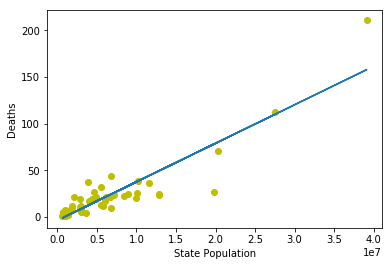

In [5]:
# Regression line and results for populations (predictor variable) to death (response variable)
model = np.polyfit(df15state['Population'], df15state['Deaths'],1)
modelFit = np.poly1d(model)
plt.plot(df15state['Population'],df15state['Deaths'], 'yo',df15state['Population'], modelFit(df15state['Population']))
linregress(df15state['Population'], df15state['Deaths']) #x and y are arrays or lists.
plt.ylabel('Deaths') 
plt.xlabel('State Population')

LinregressResult(slope=0.6710301216146497, intercept=0.33267889830393305, rvalue=0.3498342249871741, pvalue=0.012760647631430819, stderr=0.25936500102530036)

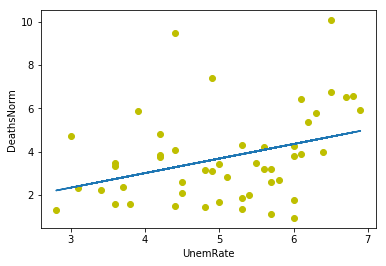

In [97]:
# Regression line and results for Gini (predictor variable) to Death/1M (response variable)
x='UnemRate'
y='DeathsNorm'

model = np.polyfit(df15state[x], df15state[y],1)
modelFit = np.poly1d(model)
plt.plot(df15state[x],df15state[y], 'yo',df15state[x], modelFit(df15state[x]))
linres=linregress(df15state[x], df15state[y]) #x and y are arrays or lists.
plt.ylabel(y) 
plt.xlabel(x)
linres

LinregressResult(slope=4.720560195579737, intercept=1.5298614485734223, rvalue=0.046754038709339404, pvalue=0.7471379319372269, stderr=14.557225141783737)

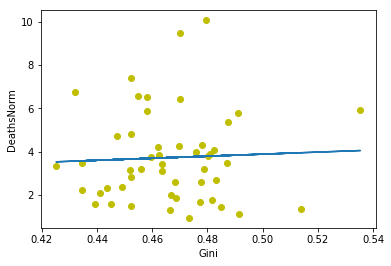

In [16]:
# Regression line and results for Gini (predictor variable) to Death/1M (response variable)
x='Gini'
y='DeathsNorm'

model = np.polyfit(df15state[x], df15state[y],1)
modelFit = np.poly1d(model)
plt.plot(df15state[x],df15state[y], 'yo',df15state[x], modelFit(df15state[x]))
linres=linregress(df15state[x], df15state[y]) #x and y are arrays or lists.
plt.ylabel(y) 
plt.xlabel(x)

linres

LinregressResult(slope=0.27084181867221874, intercept=-0.14117920557752006, rvalue=0.4025347672719408, pvalue=0.0037548467401469833, stderr=0.08890063088186205)

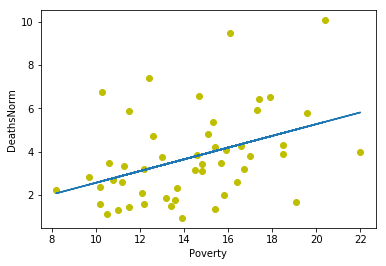

In [17]:
# Regression line and results for Gini (predictor variable) to Death/1M (response variable)
x='Poverty'
y='DeathsNorm'

model = np.polyfit(df15state[x], df15state[y],1)
modelFit = np.poly1d(model)
plt.plot(df15state[x],df15state[y], 'yo',df15state[x], modelFit(df15state[x]))
linres=linregress(df15state[x], df15state[y]) #x and y are arrays or lists.
plt.ylabel(y) 
plt.xlabel(x)

linres

LinregressResult(slope=-0.15044271263400502, intercept=4.485817320328064, rvalue=-0.0636296579887136, pvalue=0.660665197009766, stderr=0.34057282529163235)

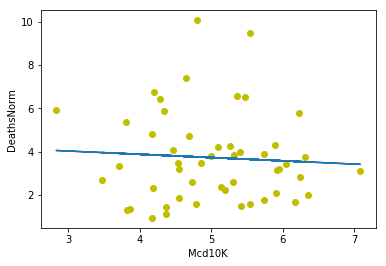

In [20]:
# Regression line and results for Gini (predictor variable) to Death/1M (response variable)
x='Mcd10K'
y='DeathsNorm'

model = np.polyfit(df15state[x], df15state[y],1)
modelFit = np.poly1d(model)
plt.plot(df15state[x],df15state[y], 'yo',df15state[x], modelFit(df15state[x]))
linres=linregress(df15state[x], df15state[y]) #x and y are arrays or lists.
plt.ylabel(y) 
plt.xlabel(x)

linres

LinregressResult(slope=-0.0007436443538732331, intercept=3.965454719355834, rvalue=-0.11153910077367736, pvalue=0.4406103364732742, stderr=0.0009563107974755188)

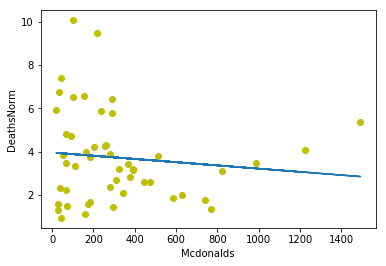

In [56]:
# Regression line and results for Gini (predictor variable) to Death/1M (response variable)
x='Mcdonalds'
y='DeathsNorm'

model = np.polyfit(df15state[x], df15state[y],1)
modelFit = np.poly1d(model)
plt.plot(df15state[x],df15state[y], 'yo',df15state[x], modelFit(df15state[x]))
linres=linregress(df15state[x], df15state[y]) #x and y are arrays or lists.
plt.ylabel(y) 
plt.xlabel(x)

linres

2.123082787948654 3.3948682898043216 4.633193864454226 2.064029962628827


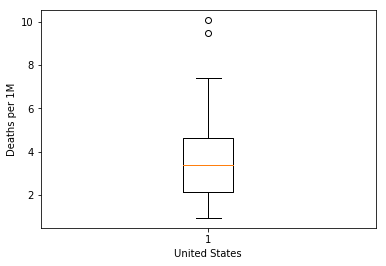

In [98]:
r=plt.boxplot(df15state['DeathsNorm'])
Q1 = df15state['DeathsNorm'].quantile(0.25)
Q2 = df15state['DeathsNorm'].quantile(0.50)
Q3 = df15state['DeathsNorm'].quantile(0.75)
s = np.std( df15state['DeathsNorm'])
plt.ylabel('Deaths per 1M') 
plt.xlabel('United States')

print(Q1,Q2,Q3,s)

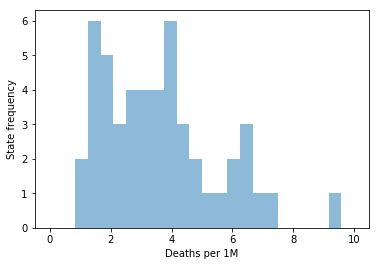

In [101]:
bins = np.linspace(0, 10, 25)
plt.hist(df15state['DeathsNorm'], bins, alpha=0.5)
plt.xlabel('Deaths per 1M') 
plt.ylabel('State frequency')
plt.show()